In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #解决seaborn中文字体显示问题
plt.rc('figure', figsize=(10, 10))  #把plt默认的图片size调大一点
plt.rcParams["figure.dpi"] =mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline

In [2]:
data_kdgd = pd.read_csv("幼儿园.csv")
data_pmsc = pd.read_csv("中小学.csv")
data_trn = pd.read_csv("外语培训.csv")
data_clg = pd.read_csv("职业院校.csv")
data_tic = pd.read_csv("teachinchina.csv")
data_jlc = pd.read_csv("jobleadchina.csv")
data_gm = pd.read_csv("groupmembers.csv")

In [3]:
data_kdgd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 7 columns):
area           189 non-null object
company        189 non-null object
exp_title      189 non-null object
link           189 non-null object
salary         189 non-null object
title          189 non-null object
update_time    189 non-null object
dtypes: object(7)
memory usage: 10.4+ KB


In [4]:
data_kdgd.sample(5)

,area,company,exp_title,link,salary,title,update_time
139,江苏-苏州-太仓市,太仓华顿外国语学校,一年以上/大学本科以上,/jobs_view_390894.html,5K-7K/月,幼儿园教师（英语）,2019/04/03
20,广东-佛山,广东省佛山习思堂教育,不限/大专以上,/jobs_view_409241.html,5K-6K/月,英语早教老师（提供吃住+六险一金）,2019/04/06
55,广东-东莞,上海交通大学昂立教育集团东莞分校,不限/大专以上,/jobs_view_403228.html,5K-8K/月,幼儿英语老师（东城区）,2019/04/04
151,海南-海口-龙华区,海口斯诺威培训中心,一年以上/大专以上,/jobs_view_423192.html,4K-7K/月,幼儿英语教师,2019/04/02
39,广东-深圳-罗湖区,深圳市学为方文化发展有限公司,一年以上/大学本科以上,/jobs_view_430852.html,5K-8K/月,幼儿英语老师,2019/04/04


In [5]:
# 把来自万行教师的四个数据集组合成一个Dataframe
data_kdgd['type'] = '幼儿园'
data_pmsc['type'] = '中小学'
data_trn['type'] = '外语培训'
data_clg['type'] = '职业院校'
data_wx = pd.concat([data_kdgd, data_pmsc, data_trn, data_clg])

In [6]:
data_wx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5787 entries, 0 to 27
Data columns (total 8 columns):
area           5787 non-null object
company        5787 non-null object
exp_title      5787 non-null object
link           5787 non-null object
salary         5787 non-null object
title          5787 non-null object
update_time    5787 non-null object
type           5787 non-null object
dtypes: object(8)
memory usage: 406.9+ KB


In [7]:
data_wx.sample(5)

,area,company,exp_title,link,salary,title,update_time,type
179,广东-广州-越秀区,广州沃迩德教育科技有限公司,不限/大学本科以上,/jobs_view_425078.html,5K-8K/月,少儿英语教师,2019/04/04,外语培训
509,广东-广州-花都区,广州柠檬树外语教育咨询有限公司,不限/大专以上,/jobs_view_405564.html,6K-12K/月,小学初中（高中）英语教师,2019/04/05,中小学
2121,江苏-徐州-睢宁县,江苏省睢宁县宁海外国语学校,不限/不限,/jobs_view_307614.html,3.5K-5K/月,初中英语教师,2019/04/04,中小学
4528,广东-肇庆,名师教育培训中心,不限/不限以上,/jobs_view_257006.html,4K-8K/月,小学英语教师,2019/03/29,中小学
2434,广东-深圳,深圳自成蹊教育科技有限公司,两年以上/大学本科,/jobs_view_426793.html,5K-8K/月,小学英语老师,2019/04/04,中小学


### 万行教师数据清洗
- 清洗出省份、城市
- 经验、学历
- 工资

#### 1. 清洗出省份、城市

In [8]:
data_wx['area'].sample(10)

5008                 广东-广州
1727             浙江-金华-义乌市
4678    贵州-黔西南布依族苗族自治州-兴义市
2361                 广东-深圳
3085                 浙江-湖州
60                   广东-清远
500                  广东-深圳
1460             浙江-杭州-滨江区
2989                重庆-长寿区
4155             江苏-苏州-昆山市
Name: area, dtype: object

In [9]:
data_wx['area'].str.split("-", expand=True)

,0,1,2
0,江苏,苏州,相城区
1,福建,莆田,None
2,广东,惠州,惠城区
3,广东,深圳,龙岗区
4,广东,惠州,惠城区
5,广东,深圳,龙岗区
6,上海,None,None
7,上海,None,None
8,江苏,苏州,昆山市
9,广东,东莞,None


In [10]:
data_wx['province'] = data_wx['area'].str.split("-", expand=True)[0]
data_wx['city'] = data_wx['area'].str.split("-", expand=True)[1]
# 把北京、天津、上海、重庆的城市改为原来的名字
data_wx.loc[data_wx['province'] == '北京', 'city'] = '北京'
data_wx.loc[data_wx['province'] == '上海', 'city'] = '上海'
data_wx.loc[data_wx['province'] == '天津', 'city'] = '天津'
data_wx.loc[data_wx['province'] == '重庆', 'city'] = '重庆'

#### 2. 清洗出经验、学历

In [11]:
data_wx['exp_title'].sample(5)

3672    一年以上/大学本科
2333      不限/大学本科
3239    一年以上/大专以上
5125    不限/大学本科以上
3101      三年以上/大专
Name: exp_title, dtype: object

In [12]:
data_wx['exp'] = data_wx['exp_title'].str.split("/", expand=True)[0]
data_wx['degree'] = data_wx['exp_title'].str.split("/", expand=True)[1]

In [13]:
data_wx['exp'].unique()

array(['不限', '一年以上', '三年以上', '两年以上', '五年以上', '应届毕业生', '六年以上', '四年以上',
       '九年以上', '七年以上', '十年以上', '在读学生', '八年以上'], dtype=object)

In [14]:
exp_map = {'不限':'经验不限', '一年以上':'一到三年', '三年以上':'三到五年', '两年以上':'一到三年',
           '五年以上':'五到十年', '应届毕业生':'经验不限', '六年以上':'五到十年', '四年以上':'三到五年',
           '九年以上':'五到十年', '七年以上':'五到十年', '十年以上':'十年以上', '在读学生':'经验不限', 
           '八年以上':'五到十年'}
data_wx['exp'] = data_wx['exp'].map(exp_map)

In [15]:
data_wx['degree'].unique()

array(['大专', '不限', '大学本科以上', '大学本科', '大专以上', '不限以上', '中专以上', '硕士以上', '硕士',
       '高中以上', '中专'], dtype=object)

In [16]:
degree_map = {'大专':'大专', '不限':'学历不限', '大学本科以上':'本科', '大学本科':'本科', 
              '大专以上':'大专', '不限以上':'学历不限', '中专以上':'中专', '硕士以上':'硕士', 
              '硕士':'硕士', '高中以上':'高中', '中专':'中专'}
data_wx['degree'] = data_wx['degree'].map(degree_map)

In [17]:
data_wx.sample(5)

,area,company,exp_title,link,salary,title,update_time,type,province,city,exp,degree
3331,浙江-杭州-西湖区,杭州尤若教育咨询服务有限公司,不限/大学本科以上,/jobs_view_405661.html,3K-5K/月,高中英语助教老师,2019/04/03,中小学,浙江,杭州,经验不限,本科
5081,广东-汕尾-海丰县,海丰县德源文武学校,两年以上/大专,/jobs_view_30391.html,3.5K-5K/月,小学英语教师,2019/03/04,中小学,广东,汕尾,一到三年,大专
119,广东-东莞,上海交通大学昂立教育集团东莞分校,不限/大学本科以上,/jobs_view_398468.html,6K-10K/月,年薪10万优秀少儿英语老师（东莞市东城区）,2019/04/04,外语培训,广东,东莞,经验不限,本科
668,北京-顺义区,北京优翰文化传播有限公司,不限/不限,/jobs_view_427084.html,9W-16W/年,初中英语教师,2019/04/05,中小学,北京,北京,经验不限,学历不限
4948,浙江-杭州-余杭区,杭州市余杭区信达外国语学校,不限/大学本科以上,/jobs_view_358561.html,17.5W-35W/年,初中英语老师,2019/03/15,中小学,浙江,杭州,经验不限,本科


#### 3. 清洗出工资

In [18]:
data_wx['salary'].unique()

array(['10W-12W/年', '3.5K-7K/月', '6K-10K/月', '8K-12K/月', '5K-10K/月',
       '8K-15K/月', '5K-8K/月', '7K-10K/月', '8K-10K/月', '6K-8K/月',
       '8W-12W/年', '5K-6K/月', '4K-6K/月', '9W-12W/年', '4.5K-6K/月',
       '4K-8K/月', '8W-8W/年', '4K-5.5K/月', '3K-5K/月', '4.5K-8K/月',
       '2.8K-3.5K/月', '6K-12K/月', '6W-9W/年', '10W-15W/年', '10K-15K/月',
       '4K-7K/月', '3K-6K/月', '8W-8.5W/年', '6K-7.5K/月', '9K-18K/月',
       '0.8W-1W/年', '2K-3K/月', '6W-12W/年', '7K-12K/月', '2.6K-5K/月',
       '6W-8W/年', '5.5K-5.7K/月', '6.4K-8.4K/月', '3.5K-6K/月', '6.5W-10W/年',
       '3.8K-5K/月', '8W-15W/年', '12K-22K/月', '10K-16K/月', '3.5K-8K/月',
       '1.8K-4K/月', '3K-4K/月', '4W-8W/年', '5W-10W/年', '5K-7K/月',
       '4.8W-8W/年', '2K-4K/月', '10K-14K/月', '3.5K-4.6K/月', '10W-20W/年',
       '2.5K-3K/月', '4.5W-6.5W/年', '面议', '3.5K-4.5K/月', '8W-16W/年',
       '4W-7W/年', '3K-4.5K/月', '4W-6W/年', '8K-16K/月', '9W-16W/年',
       '7.5W-13W/年', '20K-28K/月', '7K-11K/月', '5W-6W/年', '13W-13W/年',
       '3.5K-4K/月', '2K-2K/月', '9W-18W/年'

In [101]:
def get_salary(data):
    pat_K = r"(.*)K-(.*)K"
    pat_W = r"(.*)W-(.*)W"
    pat = r"(.*)-(.*)/"
    if '面议' in data:
        return np.nan
    if '享公办教师薪资待遇' in data:
        return np.nan
    if 'K' in data and '月' in data:
        low, high = re.findall(pattern=pat_K, string=data)[0]
        return (float(low)+float(high))/2
    if 'W' in data and '年' in data:
        low, high = re.findall(pattern=pat_W, string=data)[0]
        return (float(low)+float(high))/2*10/12
    if 'K' not in data and '月' in data:
        low, high = re.findall(pattern=pat, string=data)[0]
        return (float(low)+float(high))/2/1000

data_wx['salary_clean'] = data_wx['salary'].apply(get_salary)

In [102]:
data_wx['salary_clean'] = np.round(data_wx['salary_clean'], 1)

In [103]:
data_wx.sample(5)

,area,company,exp_title,link,salary,title,update_time,type,province,city,exp,degree,salary_clean
4044,湖北-黄冈-红安县,湖北黄冈市红安国际育才实验学校,不限/大学本科以上,/jobs_view_427888.html,7K-12K/月,初中英语老师,2019/04/02,中小学,湖北,黄冈,经验不限,本科,9.5
3947,山东-菏泽,菏泽国开实验学校,不限/大学本科以上,/jobs_view_418933.html,4K-8K/月,小学英语教师,2019/04/02,中小学,山东,菏泽,经验不限,本科,6.0
2408,广东-深圳,深圳理化大师文化发展有限公司,不限/大专以上,/jobs_view_427570.html,6K-8K/月,初中英语老师,2019/04/04,中小学,广东,深圳,经验不限,大专,7.0
5169,黑龙江-绥化-青冈县,青冈县剑桥英语学校,不限/不限,/jobs_view_95491.html,2.5K-4K/月,初中数学教师,2018/11/01,中小学,黑龙江,绥化,经验不限,学历不限,3.2
1603,江苏-徐州-鼓楼区,徐州新东方学校,不限/大学本科以上,/jobs_view_384975.html,5K-8K/月,初中英语教师,2019/04/04,中小学,江苏,徐州,经验不限,本科,6.5


### JobLeadChina数据清洗
- 清洗出“exp_title”
- 清洗出“salary”

In [28]:
data_jlc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 9 columns):
area           954 non-null object
com_type       954 non-null object
company        954 non-null object
education      954 non-null object
exp_title      954 non-null object
link           954 non-null object
salary         954 non-null object
title          954 non-null object
update_time    954 non-null object
dtypes: object(9)
memory usage: 67.2+ KB


In [44]:
data_jlc.sample(5)

,area,com_type,company,education,exp_title,link,salary,title,update_time
132,Hangzhou,School,Hailiang ECE,Bachelor,Experience: Associate,http://www.jobleadchina.com/job/3159,15K/MTH - 18K/MTH,Foreign Kindergarten Teacher,"Post time: December 12, 2018"
81,Hangzhou,School,Hailiang ECE,Bachelor,Experience: Associate,http://www.jobleadchina.com/job/3321,15K/MTH - 18K/MTH,Foreign Kindergarten Teacher,"Post time: January 30, 2019"
817,Beijing,Teaching Center,Wilshire Global Consulting,Bachelor,Experience: Associate,http://www.jobleadchina.com/job/483,12K/MTH - 18K/MTH,English Teacher,"Post time: March 23, 2017"
10,Beijing,Teaching Center,Sara,Bachelor,Experience: Mid-Senior Level,http://www.jobleadchina.com/job/3935,8000K/MTH - 20000K/MTH,Native english teacher wanted in beijing ASAP,"Post time: March 28, 2019"
430,Beijing,School,Imagine Preschool,Bachelor,Experience: Associate,http://www.jobleadchina.com/job/1787,15K/MTH - 23K/MTH,English teachers for International schools,"Post time: March 30, 2018"


#### 1. 清洗出exp_title

In [45]:
data_jlc['exp_title'].unique()

array(['Experience: Mid-Senior Level', 'Experience: Entry Level',
       'Experience: Associate', 'Experience: Director',
       'Experience: Executive', 'Experience: Internship'], dtype=object)

In [47]:
data_jlc['exp_title_clean'] = data_jlc['exp_title'].str.split(": ", expand=True)[1]

#### 2. 清洗出salary

In [49]:
data_jlc['salary'].unique()

array(['15000K/MTH - 20000K/MTH', '13K/MTH - 26K/MTH',
       '13K/MTH - 18K/MTH', '10000K/MTH - 20000K/MTH',
       '15K/MTH - 22K/MTH', '8000K/MTH - 20000K/MTH', '20K/MTH - 25K/MTH',
       '16K/MTH - 23K/MTH', '8K/MTH - 14K/MTH', '15K/MTH - 18K/MTH',
       '20000K/MTH - 30000K/MTH', '13K/MTH - 20K/MTH',
       '11K/MTH - 16K/MTH', '20K/MTH - 28K/MTH', '6000K/MTH - 20000K/MTH',
       '8K/MTH - 18K/MTH', '20K/MTH - 30K/MTH', '8000K/MTH - 18000K/MTH',
       '12K/MTH - 16K/MTH', '13000K/MTH - 16000K/MTH',
       '14K/MTH - 18K/MTH', '15K/MTH - 30K/MTH', '12K/MTH - 25K/MTH',
       '8K/MTH - 20K/MTH', '13K/MTH - 25K/MTH', '13K/MTH - 16K/MTH',
       '10K/MTH - 30K/MTH', '8K/MTH - 12K/MTH', '20K/MTH - 26K/MTH',
       '26K/MTH - 28K/MTH', '13000K/MTH - 25000K/MTH',
       '13000K/MTH - 15000K/MTH', '15K/MTH - 25K/MTH',
       '12000K/MTH - 20000K/MTH', '18K/MTH - 25K/MTH',
       '16000K/MTH - 19000K/MTH', '12K/MTH - 17K/MTH',
       '15K/MTH - 17K/MTH', '7K/MTH - 18K/MTH', '20K/MTH - 

In [57]:
def get_salary_jlc(data):
    pat_jlc = r"(.*)K/MTH - (.*)K/MTH"
    if '00' in data:
        low, high = re.findall(pattern=pat_jlc, string=data)[0]
        return (float(low)+float(high))/2/1000
    else:
        low, high = re.findall(pattern=pat_jlc, string=data)[0]
        return (float(low)+float(high))/2

data_jlc['salary_clean'] = data_jlc['salary'].apply(get_salary_jlc)

In [59]:
data_jlc.sample(5)

,area,com_type,company,education,exp_title,link,salary,title,update_time,exp_title_clean,salary_clean
26,Hangzhou,School,Hailiang ECE,Bachelor,Experience: Associate,http://www.jobleadchina.com/job/3859,15K/MTH - 18K/MTH,Foreign Kindergarten Teacher,"Post time: March 15, 2019",Associate,16.5
525,Others,Teaching Center,Meten likeshuo English,Bachelor,Experience: Internship,http://www.jobleadchina.com/job/1349,0K/MTH - 0K/MTH,Hiring Homebased Online Tutors,"Post time: November 06, 2017",Internship,0.0
501,Hangzhou,Teaching Center,Wanin Education,Any education,Experience: Entry Level,http://www.jobleadchina.com/job/1453,4K/MTH - 12K/MTH,English Teacher full time/part time,"Post time: December 04, 2017",Entry Level,8.0
929,Shenzhen,Teaching Center,I2 国际私塾,Bachelor,Experience: Executive,http://www.jobleadchina.com/job/142,18K/MTH - 21K/MTH,ESL teacher needed in Shenzhen i2,"Post time: October 24, 2016",Executive,19.5
183,Shanghai,Others,Dongsheng New Material,Any education,Experience: Associate,http://www.jobleadchina.com/job/2800,8000K/MTH - 13000K/MTH,English Teacher for Adult and Children,"Post time: October 17, 2018",Associate,10.5


### 微信群成员数据清洗

In [3]:
data_gm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 31 columns):
Alias               0 non-null float64
AppAccountFlag      498 non-null int64
AttrStatus          498 non-null int64
ChatRoomId          498 non-null int64
City                282 non-null object
ContactFlag         498 non-null int64
DisplayName         408 non-null object
EncryChatRoomId     498 non-null object
HeadImgUrl          498 non-null object
HideInputBarFlag    498 non-null int64
IsOwner             498 non-null int64
KeyWord             53 non-null object
MemberCount         498 non-null int64
MemberList          498 non-null object
NickName            498 non-null object
OwnerUin            498 non-null int64
PYInitial           495 non-null object
PYQuanPin           495 non-null object
Province            358 non-null object
RemarkName          0 non-null float64
RemarkPYInitial     0 non-null float64
RemarkPYQuanPin     0 non-null float64
Sex                 498 non-

In [4]:
data_gm.sample(5)

,Alias,AppAccountFlag,AttrStatus,ChatRoomId,City,ContactFlag,DisplayName,EncryChatRoomId,HeadImgUrl,HideInputBarFlag,...,RemarkPYQuanPin,Sex,Signature,SnsFlag,StarFriend,Statues,Uin,UniFriend,UserName,VerifyFlag
80,NaN,0,34050853,0,滨海新区,0,19 Leigh🌹,@dd5b72bfc42dc034fb6c8b08740639a9,/cgi-bin/mmwebwx-bin/webwxgeticon?seq=0&userna...,0,...,NaN,2,Faith is seeing God in the Dark and in the Lig...,1,0,0,0,0,@ccf6c688a76644a317927ed5eaae67c6d438daef4f1a0...,0
415,NaN,0,102437,0,和平,0,NaN,@dd5b72bfc42dc034fb6c8b08740639a9,/cgi-bin/mmwebwx-bin/webwxgeticon?seq=0&userna...,0,...,NaN,1,NaN,1,0,0,0,0,@84cfa0da4143c62045fcf967a2779764539b0f84352cf...,0
422,NaN,0,4296805,0,荆州,0,NaN,@dd5b72bfc42dc034fb6c8b08740639a9,/cgi-bin/mmwebwx-bin/webwxgeticon?seq=0&userna...,0,...,NaN,2,Persistence and Determination,17,0,0,0,0,@9f0b39d7fb526bfdff26afb3b0c7474ac35ab57c5a6f7...,0
96,NaN,0,100903,0,NaN,0,19' Youthquake,@dd5b72bfc42dc034fb6c8b08740639a9,/cgi-bin/mmwebwx-bin/webwxgeticon?seq=0&userna...,0,...,NaN,1,放开想象 行动行动再行动 战斗战斗再战斗!,49,0,0,0,0,@b067c8975d5328a928b7342689c9d75eb958398282d55...,0
292,NaN,0,102437,0,NaN,0,19’ Sofia Shu,@dd5b72bfc42dc034fb6c8b08740639a9,/cgi-bin/mmwebwx-bin/webwxgeticon?seq=0&userna...,0,...,NaN,0,NaN,0,0,0,0,0,@b1b07112e77ac3c7af72dbf960cb93f0d67bb2f9c27dd...,0


In [5]:
data_gm.iloc[99]

Alias                                                             NaN
AppAccountFlag                                                      0
AttrStatus                                                   33656869
ChatRoomId                                                          0
City                                                               昌平
ContactFlag                                                         0
DisplayName                                                   19 Marc
EncryChatRoomId                     @dd5b72bfc42dc034fb6c8b08740639a9
HeadImgUrl          /cgi-bin/mmwebwx-bin/webwxgeticon?seq=0&userna...
HideInputBarFlag                                                    0
IsOwner                                                             0
KeyWord                                                           NaN
MemberCount                                                         0
MemberList                                                         []
NickName            

In [6]:
data_gm = data_gm[['NickName', 'City', 'Province', 'Sex', 'Signature']]

In [7]:
data_gm.to_csv("data_gm.csv", index=False)

### 问题：
1. 洋外教的工资真的高吗？
2. 市场对于洋外教的经验和学历要求如何？
3. 哪些地区对洋外教的需求多？
4. 什么机构在招聘洋外教？
5. 洋外教来源真的很乱吗？

# 1. 洋外教的工资真的高吗？

In [371]:
data_jlc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 12 columns):
area               954 non-null object
com_type           954 non-null object
company            954 non-null object
education          954 non-null object
exp_title          954 non-null object
link               954 non-null object
salary             954 non-null object
title              954 non-null object
update_time        954 non-null object
exp_title_clean    954 non-null object
salary_clean       954 non-null float64
teacher_type       954 non-null object
dtypes: float64(1), object(11)
memory usage: 89.5+ KB


In [372]:
data_wx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5780 entries, 0 to 27
Data columns (total 14 columns):
area            5780 non-null object
company         5780 non-null object
exp_title       5780 non-null object
link            5780 non-null object
salary          5780 non-null object
title           5780 non-null object
update_time     5780 non-null object
type            5780 non-null object
province        5780 non-null object
city            5769 non-null object
exp             5780 non-null object
degree          5780 non-null object
salary_clean    5687 non-null float64
teacher_type    5780 non-null object
dtypes: float64(1), object(13)
memory usage: 677.3+ KB


In [111]:
data_wx.drop(data_wx[data_wx['salary_clean']>40].index, inplace=True)

In [130]:
data_wx['teacher_type'] = '中教'
data_jlc['teacher_type'] = '外教'
data_salary = pd.concat([data_wx[['salary_clean', 'teacher_type']],
                        data_jlc[['salary_clean', 'teacher_type']]])
data_salary.rename(columns={'salary_clean':'工资', 'teacher_type':'教师类型'}, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


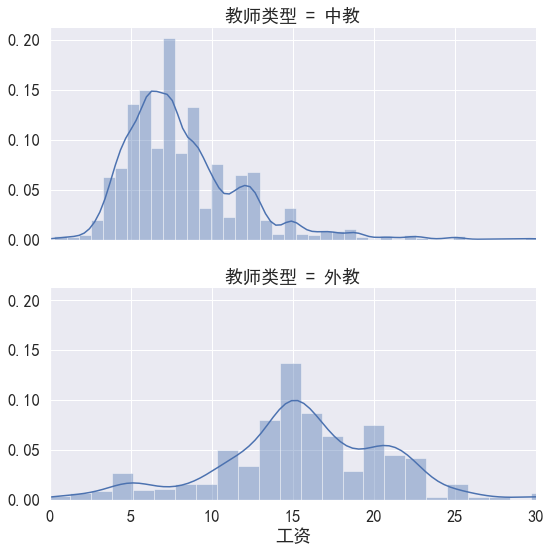

In [154]:
# sns.set(font_scale=1.5)
g = sns.FacetGrid(data_salary, row="教师类型", size=4, aspect=2, xlim=(0,30))
g.map(sns.distplot, "工资", rug=False)

In [138]:
np.round(data_jlc['salary_clean'].mean(), 1)

15.7

In [139]:
np.round(data_wx['salary_clean'].mean(), 1)

8.3

In [362]:
data_wx.groupby('city')['salary_clean'].mean().mean()

7.929763476810974

In [374]:
np.round(data_wx.groupby('city')['salary_clean'].mean().sort_values()[:10], 1)

city
绥化         3.0
焦作         3.5
信阳         3.8
琼海市        3.8
通化         3.8
贵港         3.9
临高县        4.0
漯河         4.0
乐东黎族自治县    4.2
武威         4.3
Name: salary_clean, dtype: float64

In [140]:
# 通过经验进行对比
data_jlc.loc[data_jlc['exp_title_clean']=='Associate', 'exp_title_clean'] = 'Entry Level'

In [141]:
np.round(data_jlc.groupby('exp_title_clean')['salary_clean'].mean(), 1)

exp_title_clean
Director            20.9
Entry Level         15.8
Executive           14.0
Internship          10.1
Mid-Senior Level    15.8
Name: salary_clean, dtype: float64

In [142]:
np.round(data_wx.groupby('exp')['salary_clean'].mean(), 1)

exp
一到三年     8.0
三到五年    10.1
五到十年    13.6
十年以上    21.6
经验不限     7.8
Name: salary_clean, dtype: float64

'经验不限',     '一到三年',                '三到五年',    '五到十年',           '十年以上'
'Internship', 'Entry Level'+'Associate', 'Executive', 'Mid-Senior Level', 'Director'

In [186]:
from pyecharts import Bar


attr = ['经验不限\nInternship', '一到三年\nEntry Level', '三到五年\nExecutive',
        '五到十年\nMid-Senior', '十年以上\nDirector']
value1 = [10.1, 15.8, 14.0, 15.8, 20.9]
value2 = [7.8, 8.0, 10.1, 13.6, 21.6]

bar = Bar("不同工作经验的英语外教与中教工资对比", width = 700,height=500)
bar.add("外教", attr, value1, xaxis_label_textsize=18, legend_top=30,
        yaxis_label_textsize=20, is_label_show=True)
bar.add("中教", attr, value2, xaxis_label_textsize=18, legend_top=30,
        yaxis_label_textsize=20, is_label_show=True)
bar

In [165]:
# 通过学历进行对比
np.round(data_jlc.groupby('education')['salary_clean'].mean(),1)

education
Any education    13.9
Associate        12.8
Bachelor         16.3
Master           21.3
Name: salary_clean, dtype: float64

In [169]:
data_wx.loc[data_wx['degree']=='中专', 'degree'] = '高中'

In [170]:
np.round(data_wx.groupby('degree')['salary_clean'].mean(),1)

degree
大专       6.4
学历不限     7.5
本科       9.2
硕士      11.0
高中       4.4
Name: salary_clean, dtype: float64

In [352]:
attr = ['学历不限\nAny education', '高中', '大专\nAssociate',
        '本科\nBachelor', '硕士\nMaster']
value1 = [13.9, np.nan, 12.8, 16.3, 21.3]
value2 = [7.5, 4.4, 6.4, 9.2, 11.0]

bar = Bar("不同学历的英语外教与中教工资对比", width = 700,height=500)
bar.add("外教", attr, value1, xaxis_label_textsize=15, legend_top=30,
        yaxis_label_textsize=20, is_label_show=True)
bar.add("中教", attr, value2, xaxis_label_textsize=15, legend_top=30,
        yaxis_label_textsize=20, is_label_show=True)
bar

#### 2. 市场对于洋外教的经验和学历要求如何？

In [194]:
exp_demand = np.round(data_jlc['exp_title_clean'].value_counts()/data_jlc['exp_title_clean'].value_counts().sum()*100, 1)

In [225]:
bar = Bar("不同经验英语外教需求百分比(%)", width = 500,height=500)

bar.add("", ['入门', '中高级', '管理', '主任', '实习'], exp_demand.values,  xaxis_label_textsize=20, 
        yaxis_label_textsize=20, is_label_show=True)
bar

In [201]:
degree_demand = np.round(data_jlc['education'].value_counts()/data_jlc['education'].value_counts().sum()*100, 1)

Bachelor         73.7
Any education    24.0
Associate         1.7
Master            0.6
Name: education, dtype: float64

In [204]:
bar = Bar("不同学历英语外教需求百分比(%)", width = 500,height=500)

bar.add("", ['本科', '学历不限', '社区大学', '硕士'], degree_demand.values,  xaxis_label_textsize=18, 
        yaxis_label_textsize=20, is_label_show=True)
bar

### 3. 哪些地区对洋外教的需求多？

In [216]:
area_demand = data_jlc['area'].value_counts().nlargest(11).drop('Others')

In [226]:
bar = Bar("对外教需求排名前10的城市", width = 600,height=500)

bar.add("", ['北京', '上海', '杭州', '深圳', '成都', '重庆', '广州', '武汉', '南京', '青岛'], 
        area_demand.values,  xaxis_label_textsize=18, yaxis_label_textsize=20, 
        is_label_show=True, label_color = ['#130f40'])
bar

In [238]:
salary_area = np.round(data_jlc.groupby('area')['salary_clean'].mean()[area_demand.index], 1)

In [239]:
salary_area

Beijing      16.6
Shanghai     16.4
Hangzhou     15.6
Shenzhen     17.5
Chengdu      15.6
Chongqing    11.7
Guangzhou    15.4
Wuhan        15.2
Nanjing      10.8
Qingdao      17.0
Name: salary_clean, dtype: float64

In [366]:
# 中教对应城市的平均薪酬
city10 = ['北京', '上海', '杭州', '深圳', '成都', '重庆', '广州', '武汉', '南京', '青岛']
np.round(data_wx[data_wx['city'].isin(city10)].groupby('city')['salary_clean'].mean(), 1)

city
上海    9.3
北京    9.8
南京    8.0
广州    8.0
成都    8.9
杭州    8.9
武汉    6.9
深圳    8.6
重庆    8.0
青岛    7.8
Name: salary_clean, dtype: float64

In [370]:
bar = Bar("对外教需求排名前10的城市的外教和中教平均工资", width = 800,height=500)

bar.add("外教", city10, salary_area.values,  xaxis_label_textsize=18, yaxis_label_textsize=20, 
        is_label_show=True, legend_top=30)
bar.add("中教", city10, [9.8, 9.3, 8.9, 8.6, 8.9, 8.0, 8.0, 6.9, 8.0, 7.8],  
        xaxis_label_textsize=18, yaxis_label_textsize=20, is_label_show=True, legend_top=30)
bar

#### 4. 什么机构在招聘洋外教？

In [222]:
com_type_demand = data_jlc['com_type'].value_counts().nlargest(5)

In [223]:
com_type_demand

Teaching Center            562
School                     281
Consultancy/Legal/Admin     43
Others                      38
Outsourcing                 12
Name: com_type, dtype: int64

In [243]:
bar = Bar("对外教需求排名前5的单位类型", width = 600,height=500)

bar.add("", ['培训机构', '学校', '咨询机构', '其它', '外包机构'], 
        com_type_demand.values,  xaxis_label_textsize=18, yaxis_label_textsize=20, 
        is_label_show=True, label_color = ['#130f40'])
bar

In [230]:
np.round(data_jlc.loc[data_jlc['com_type'] =='Teaching Center', 'education'].value_counts()/562*100, 1)

Bachelor         70.1
Any education    27.6
Associate         1.8
Master            0.5
Name: education, dtype: float64

In [241]:
salary_com_type = np.round(data_jlc.groupby('com_type')['salary_clean'].mean()[com_type_demand.index], 1)

In [242]:
salary_com_type

Teaching Center            14.5
School                     18.1
Consultancy/Legal/Admin    17.0
Others                     16.8
Outsourcing                15.0
Name: salary_clean, dtype: float64

In [244]:
bar = Bar("对外教需求排名前5的单位类型的外教平均工资", width = 600,height=500)

bar.add("", ['培训机构', '学校', '咨询机构', '其它', '外包机构'], 
        salary_com_type.values,  xaxis_label_textsize=18, yaxis_label_textsize=20, 
        is_label_show=True, label_color = ['#130f40'])
bar

In [377]:
data_jlc[data_jlc['com_type']=='Teaching Center'].groupby('education')['com_type'].count()/562

education
Any education    0.275801
Associate        0.017794
Bachelor         0.701068
Master           0.005338
Name: com_type, dtype: float64

In [258]:
company = data_jlc['company'].value_counts().nlargest(50)

In [322]:
from pyecharts import WordCloud

wordcloud = WordCloud(width=1000, height=600)
wordcloud.add("", company.index, company.values, word_size_range=[20, 100])
wordcloud

### 5. 洋外教来源真的很乱吗？

In [378]:
data_gm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 6 columns):
NickName     498 non-null object
City         282 non-null object
Province     358 non-null object
Sex          498 non-null int64
Signature    273 non-null object
Province2    358 non-null object
dtypes: int64(1), object(5)
memory usage: 23.4+ KB


In [267]:
data_gm.sample(5)

,NickName,City,Province,Sex,Signature
59,Carl,NaN,NaN,1,leveluped.org
91,Sammy,Newport,Wales,1,"Live a life dat wen u die,u will be <span clas..."
254,Chunky 查努克,NaN,NaN,1,"<span class=""emoji emoji1f3ca""></span>🏼🏓🏋🏽<spa..."
212,scarlett,NaN,Frankfurt,2,NaN
244,Jackson 佩斯福,南开,天津,1,NaN


In [270]:
sex = data_gm['Sex'].value_counts()

In [303]:
from pyecharts import Pie


pie =Pie('性别比例',background_color = 'white', width=500, height=500)
pie.add('',['男性', '女性', '未知'],sex.values, 
        center = [50,50],radius=[25, 50],rosetype='radius', is_label_show=True,
       legend_text_size=16, label_text_size=16)
pie

In [342]:
data_gm['Province2'] = data_gm['Province'].str.extract(r"([a-z|A-Z]*\s?[a-z|A-Z]*)")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [345]:
province = data_gm['Province2'].value_counts().drop('')

In [346]:
province

Ontario              4
Paris                4
Johannesburg         3
California           3
Florida              3
New York             3
England              3
Istanbul             2
Dubai                2
Auckland             2
Lyon                 1
Amsterdam            1
Maryland             1
Christchurch         1
Abbotsford           1
Western Australia    1
Frankfurt            1
British Columbia     1
Quebec               1
Scotland             1
Clare                1
Toronto              1
Aragua               1
Cologne              1
Dunedin              1
Chelyabinsk          1
Buenos Aires         1
Wales                1
Bangkok              1
Sumatera Utara       1
Cape Town            1
Manila               1
Hamburg              1
Virginia             1
La Coruna            1
Leeuwarden           1
North Carolina       1
Arizona              1
Milano               1
New Jersey           1
Vienna               1
Venice               1
Kazan                1
Hyderabad  

In [349]:
wordcloud = WordCloud(width=1000, height=600)
wordcloud.add("", province.index, province.values, word_size_range=[20, 60])
wordcloud